In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_pickle('timsdaten.pkl')

## Umarbeiten der Daten
Mittels des Befehls "explode" wird die erste Dimension des Arrays in zusätzliche Zeilen im Dataframe umgewandelt. Dadurch werden alle nachfolgenden Berechnungsschritte deutlich erleichtert, weil man dann auf die Funktionen der Standardbibliotheken zurückgreifen kann.

In [3]:
df=df.explode('Arrays')
#Löschen der bisherigen Ergebnisse
#df=df.drop(['Mean_SpannungWindrad (in mV)', 'Mean_SchnelllaufzahlWindrad','Mean_Anemometer1', 'Mean_Anemometer2', 'Wirkungsgrad'], axis=1)
df.head()

,ExpName,Verzeichnis,Beschreibung,AnzahlRotorblaetter,Neigungswinkel (in °),Rotorblattform,Windstufe,Arrays
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[25.806451612903224, 1067.741935483871, 3041...."
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[29.032258064516128, 1067.741935483871, 2932...."
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[35.483870967741936, 1258.0645161290322, 3300..."
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[29.032258064516128, 1087.0967741935483, 2967..."
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[29.032258064516128, 1054.8387096774193, 3061..."


## Berechnungen

Nachfolgend sind die Berechnungen dargestellt, ebenfalls auf eine viel effizientere Art und Weise.
 - U_WR = Spannung Windrad
 - SLZ = Schnelllaufzahl
 - V1 und V2 sind die Geschwindigkeiten der Anemometer

In [4]:
t=10

def schnelllaufzahl(x):
    wr=np.where(np.diff(np.where((x[:,1])<2000,0,1))>0,0,1)
    umdr_wr=(x.shape[0]-np.count_nonzero(wr))
    return umdr_wr

def anemometer1(x):
    wr=np.where(np.diff(np.where((x[:,2])<500,0,1))>0,1,0)
    umdr_wr=(np.count_nonzero(wr))
    return umdr_wr

def anemometer2(x):
    wr=np.where(np.diff(np.where((x[:,3])<500,0,1))>0,1,0)
    umdr_wr=(np.count_nonzero(wr))
    return umdr_wr

df['U_WR']=df['Arrays'].apply(lambda x: np.mean(x[:,0]))
df['Leistung Windrad (in mW)']=df['U_WR']**2/10000
df['Schnelllaufzahl (Umdr/s)']=df['Arrays'].apply(schnelllaufzahl)/df['AnzahlRotorblaetter']/t
df['V1']=df['Arrays'].apply(anemometer1)
df['V2']=df['Arrays'].apply(anemometer2)
df['Wirkungsgrad']=0.5*(1-(df['V2']**2/df['V1']**2))*(1+(df['V2']**2/df['V1']**2))

df.head()

,ExpName,Verzeichnis,Beschreibung,AnzahlRotorblaetter,Neigungswinkel (in °),Rotorblattform,Windstufe,Arrays,U_WR,Leistung Windrad (in mW),Schnelllaufzahl (Umdr/s),V1,V2,Wirkungsgrad
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[25.806451612903224, 1067.741935483871, 3041....",26.758065,0.071599,1.55,29,16,0.453670
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[29.032258064516128, 1067.741935483871, 2932....",29.145161,0.084944,1.65,27,17,0.421420
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[35.483870967741936, 1258.0645161290322, 3300...",33.833871,0.114473,1.75,28,18,0.414606
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[29.032258064516128, 1087.0967741935483, 2967...",26.619355,0.070859,1.60,28,18,0.414606
5,Name6,Aufbau 6,NaN,2,6,Typ C,1.0,"[[29.032258064516128, 1054.8387096774193, 3061...",28.466129,0.081032,1.60,28,16,0.446689


In [5]:
g1=df.groupby(['AnzahlRotorblaetter', 'Neigungswinkel (in °)','Rotorblattform','Windstufe']).mean()

In [10]:
g1.at[(slice(None),slice(None),slice(None),2),'Steigerungsfaktor Leistung']=g1.loc[(slice(None),slice(None),slice(None),2),'Leistung Windrad (in mW)'].values/g1.loc[(slice(None),slice(None),slice(None),1),'Leistung Windrad (in mW)'].values

In [11]:
df2=g1.reset_index()

## Grafische Repräsentation

Die grafische Darstellung ist nun gar kein Problem mehr, da Seaborn automatisch den Durchschnitt von gemeinsamen Indices bildet, also alles, was in den anderen Parametern gleich ist, wird zusammengezogen. Gleichzeitig ermittelt Seaborn automatisch die Standardabweichung und trägt sie als Fehlerbalken ein.

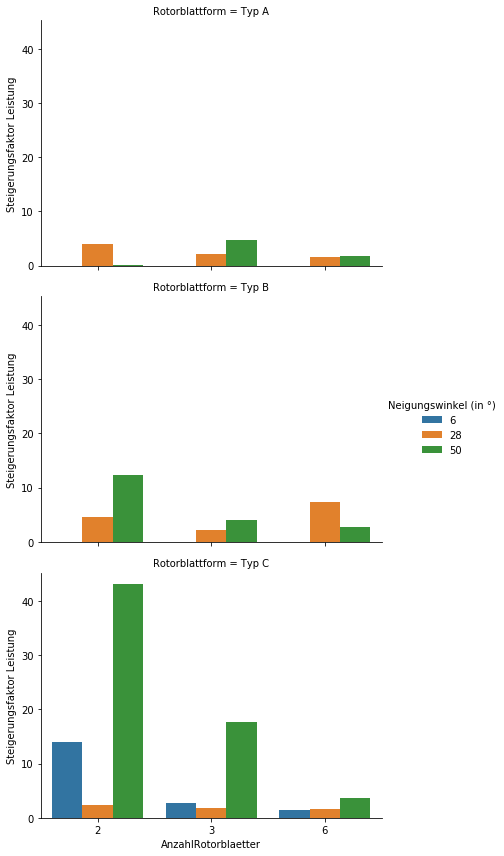

In [12]:
f = sns.catplot(x='AnzahlRotorblaetter', y='Steigerungsfaktor Leistung',hue='Neigungswinkel (in °)', row='Rotorblattform', row_order=['Typ A', 'Typ B', 'Typ C'],data=df2, kind="bar",height=4, aspect=1.4)

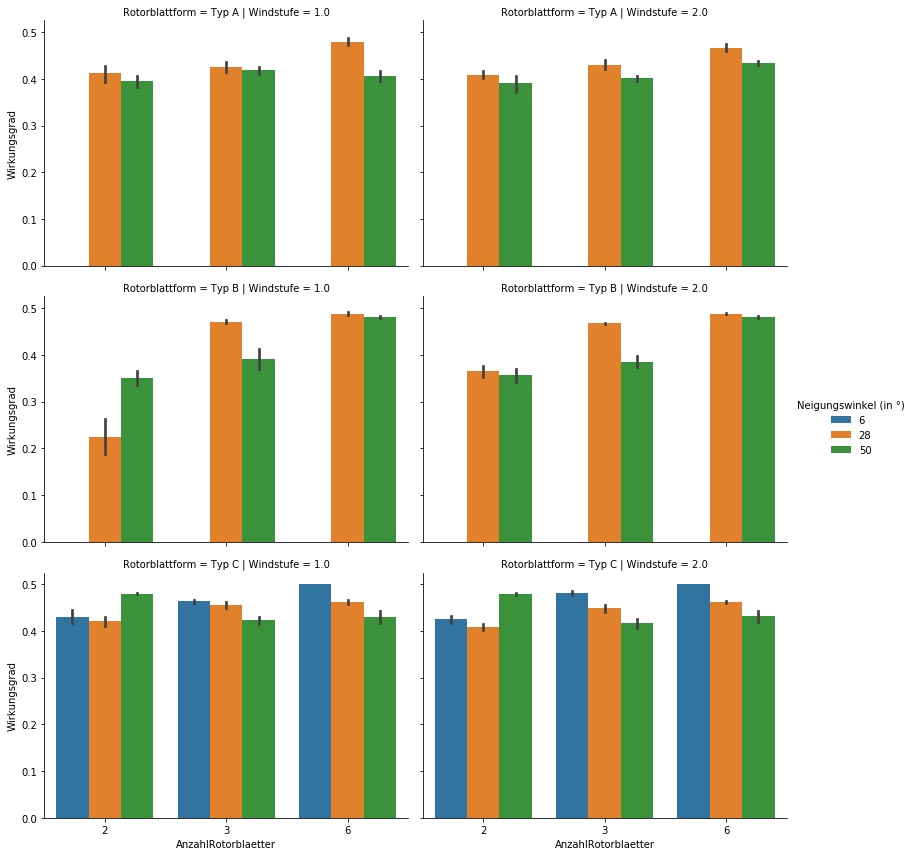

In [13]:
g = sns.catplot(x='AnzahlRotorblaetter', y='Wirkungsgrad',hue='Neigungswinkel (in °)', col='Windstufe', row='Rotorblattform', row_order=['Typ A', 'Typ B', 'Typ C'],data=df, kind="bar",height=4, aspect=1.4)

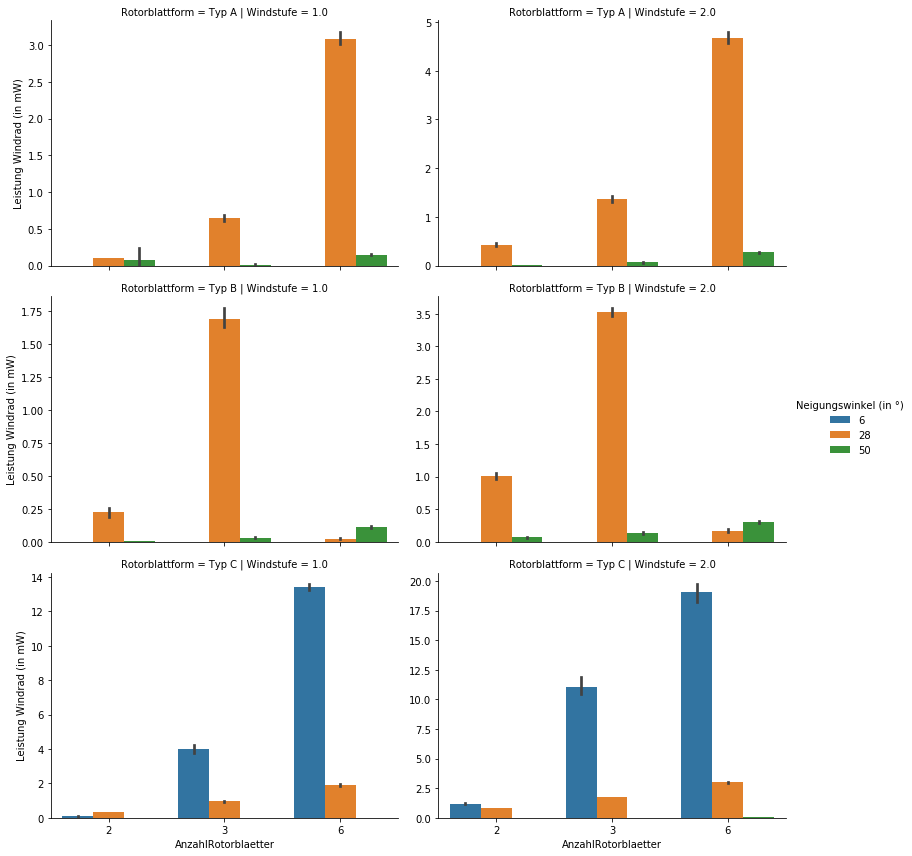

In [14]:
h = sns.catplot(x='AnzahlRotorblaetter', y='Leistung Windrad (in mW)',hue='Neigungswinkel (in °)', col='Windstufe', row='Rotorblattform', row_order=['Typ A', 'Typ B', 'Typ C'], sharey=False, data=df, kind="bar",height=4, aspect=1.4)

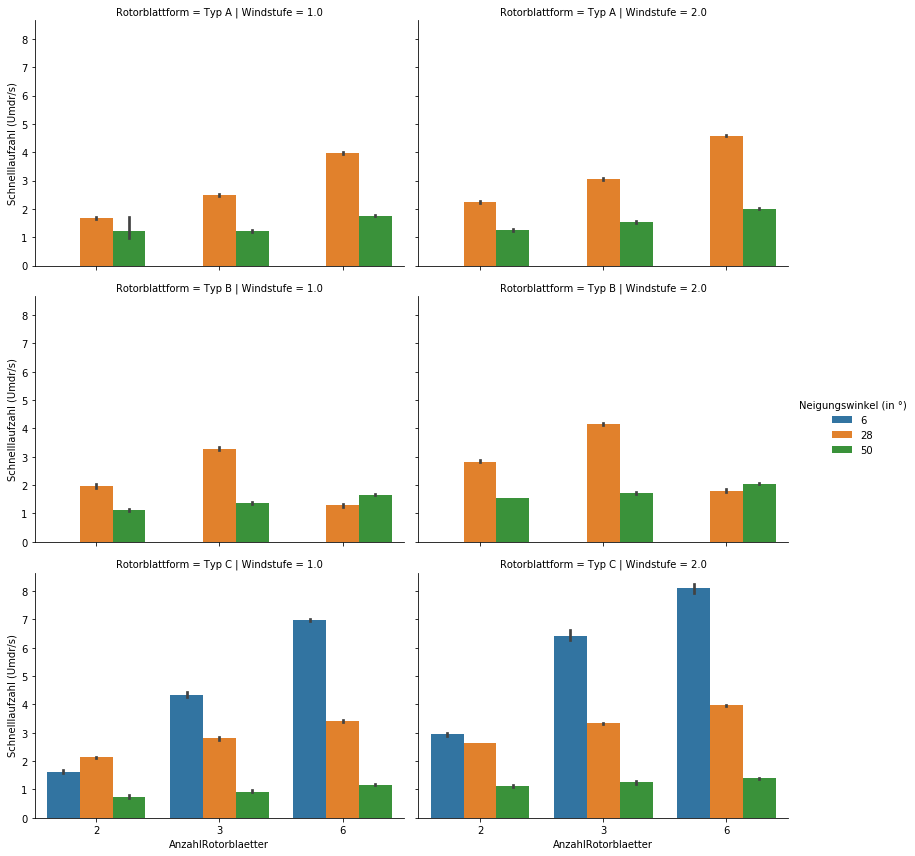

In [15]:
i = sns.catplot(x='AnzahlRotorblaetter', y='Schnelllaufzahl (Umdr/s)',hue='Neigungswinkel (in °)', col='Windstufe', row='Rotorblattform', row_order=['Typ A', 'Typ B', 'Typ C'], data=df, kind="bar",height=4, aspect=1.4)

## Tabellarische Repräsentation

Um den Überblick zu bekommen, welche Mittelwerte nun pro Aufbau herauskommen, muss man jetzt bloß noch nach ExpName groupen.

In [16]:
grouped=df.groupby('ExpName')

In [17]:
grouped.mean()

,AnzahlRotorblaetter,Neigungswinkel (in °),Windstufe,U_WR,Leistung Windrad (in mW),Schnelllaufzahl (Umdr/s),V1,V2,Wirkungsgrad
ExpName,,,,,,,,,
Name10,2.0,50.0,1.0,15.891935,0.083124,1.220000,27.800000,18.8,0.394371
Name11,2.0,50.0,1.0,7.258710,0.005375,1.130000,26.800000,19.8,0.350145
Name12,2.0,50.0,1.0,1.129032,0.000145,0.750000,37.000000,16.6,0.479683
Name15,3.0,6.0,1.0,199.256774,3.974822,4.340000,26.600000,13.8,0.463657
Name16,3.0,28.0,1.0,80.216129,0.644643,2.486667,25.800000,16.0,0.425185
Name17,3.0,28.0,1.0,130.025806,1.691868,3.283333,31.666667,15.5,0.471055
Name18,3.0,28.0,1.0,98.517419,0.970984,2.800000,26.600000,14.4,0.456532
Name19,3.0,50.0,1.0,12.003548,0.014602,1.220000,25.800000,16.4,0.417987
Name20,3.0,50.0,1.0,17.767742,0.031678,1.366667,25.600000,17.4,0.391277


In [18]:
grouped.std()

,AnzahlRotorblaetter,Neigungswinkel (in °),Windstufe,U_WR,Leistung Windrad (in mW),Schnelllaufzahl (Umdr/s),V1,V2,Wirkungsgrad
ExpName,,,,,,,,,
Name10,0.0,0.0,0.0,26.895410,0.182506,0.548407,1.303840,0.836660,0.016435
Name11,0.0,0.0,0.0,1.151002,0.001703,0.044721,0.447214,0.447214,0.018568
Name12,0.0,0.0,0.0,0.467116,0.000113,0.079057,0.707107,0.547723,0.002030
Name15,0.0,0.0,0.0,7.496319,0.297142,0.116428,0.547723,0.447214,0.003822
Name16,0.0,0.0,0.0,3.840244,0.063057,0.069121,0.447214,0.707107,0.013724
Name17,0.0,0.0,0.0,3.790522,0.100086,0.069121,0.516398,0.547723,0.004514
Name18,0.0,0.0,0.0,2.278824,0.045012,0.052705,0.547723,0.547723,0.008198
Name19,0.0,0.0,0.0,1.553911,0.003711,0.038006,0.447214,0.547723,0.009895
Name20,0.0,0.0,0.0,1.165683,0.004172,0.033333,0.547723,1.140175,0.027490


In [20]:
f.savefig("Steigerungsfaktor Leistung")
g.savefig("Wirkungsgrad.png")
h.savefig("Leistung.png")
i.savefig("Schnelllaufzahl.png")